In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
block_1_cln_data = pd.read_excel('finally_cleaned_df.xlsx',index_col='index')

<AxesSubplot:xlabel='GHI', ylabel='GTI'>

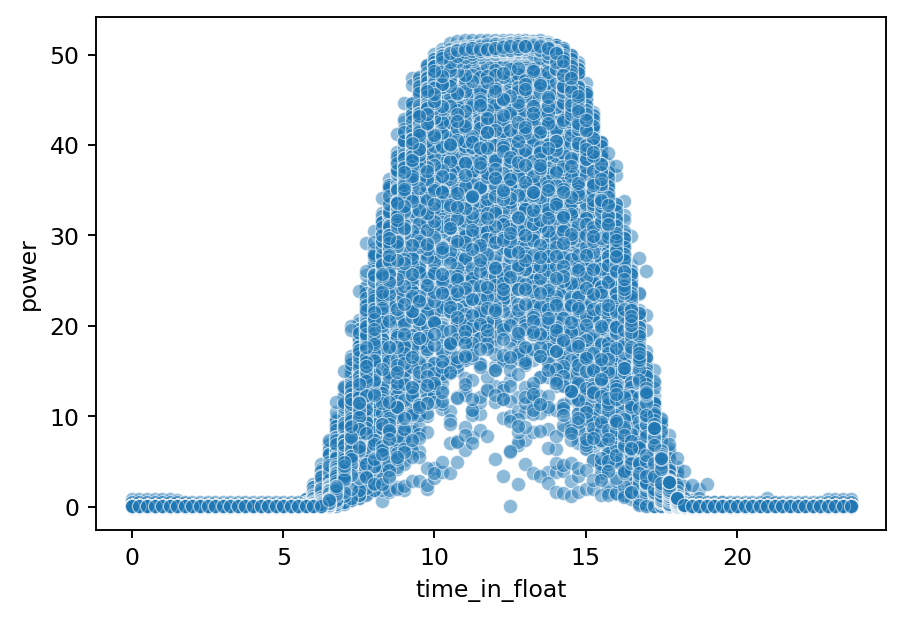

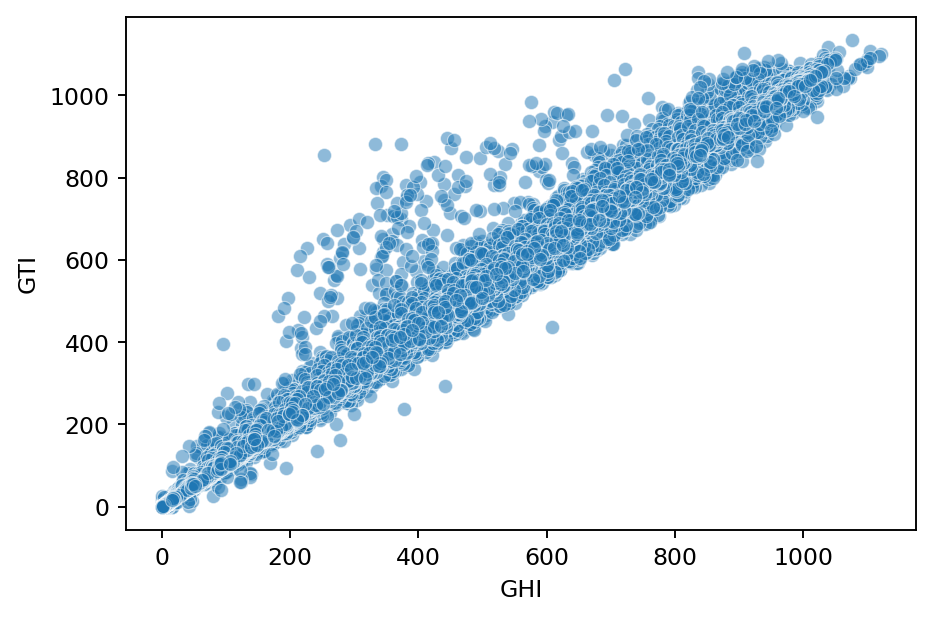

In [3]:
plt.figure(figsize=(6,4),dpi=170)
sns.scatterplot(data=block_1_cln_data,x='time_in_float',y='power',alpha=0.5)
plt.figure(figsize=(6,4),dpi=170)
sns.scatterplot(data=block_1_cln_data,x='GHI',y='GTI',alpha=0.5)

Text(0.5, 0, 'power')

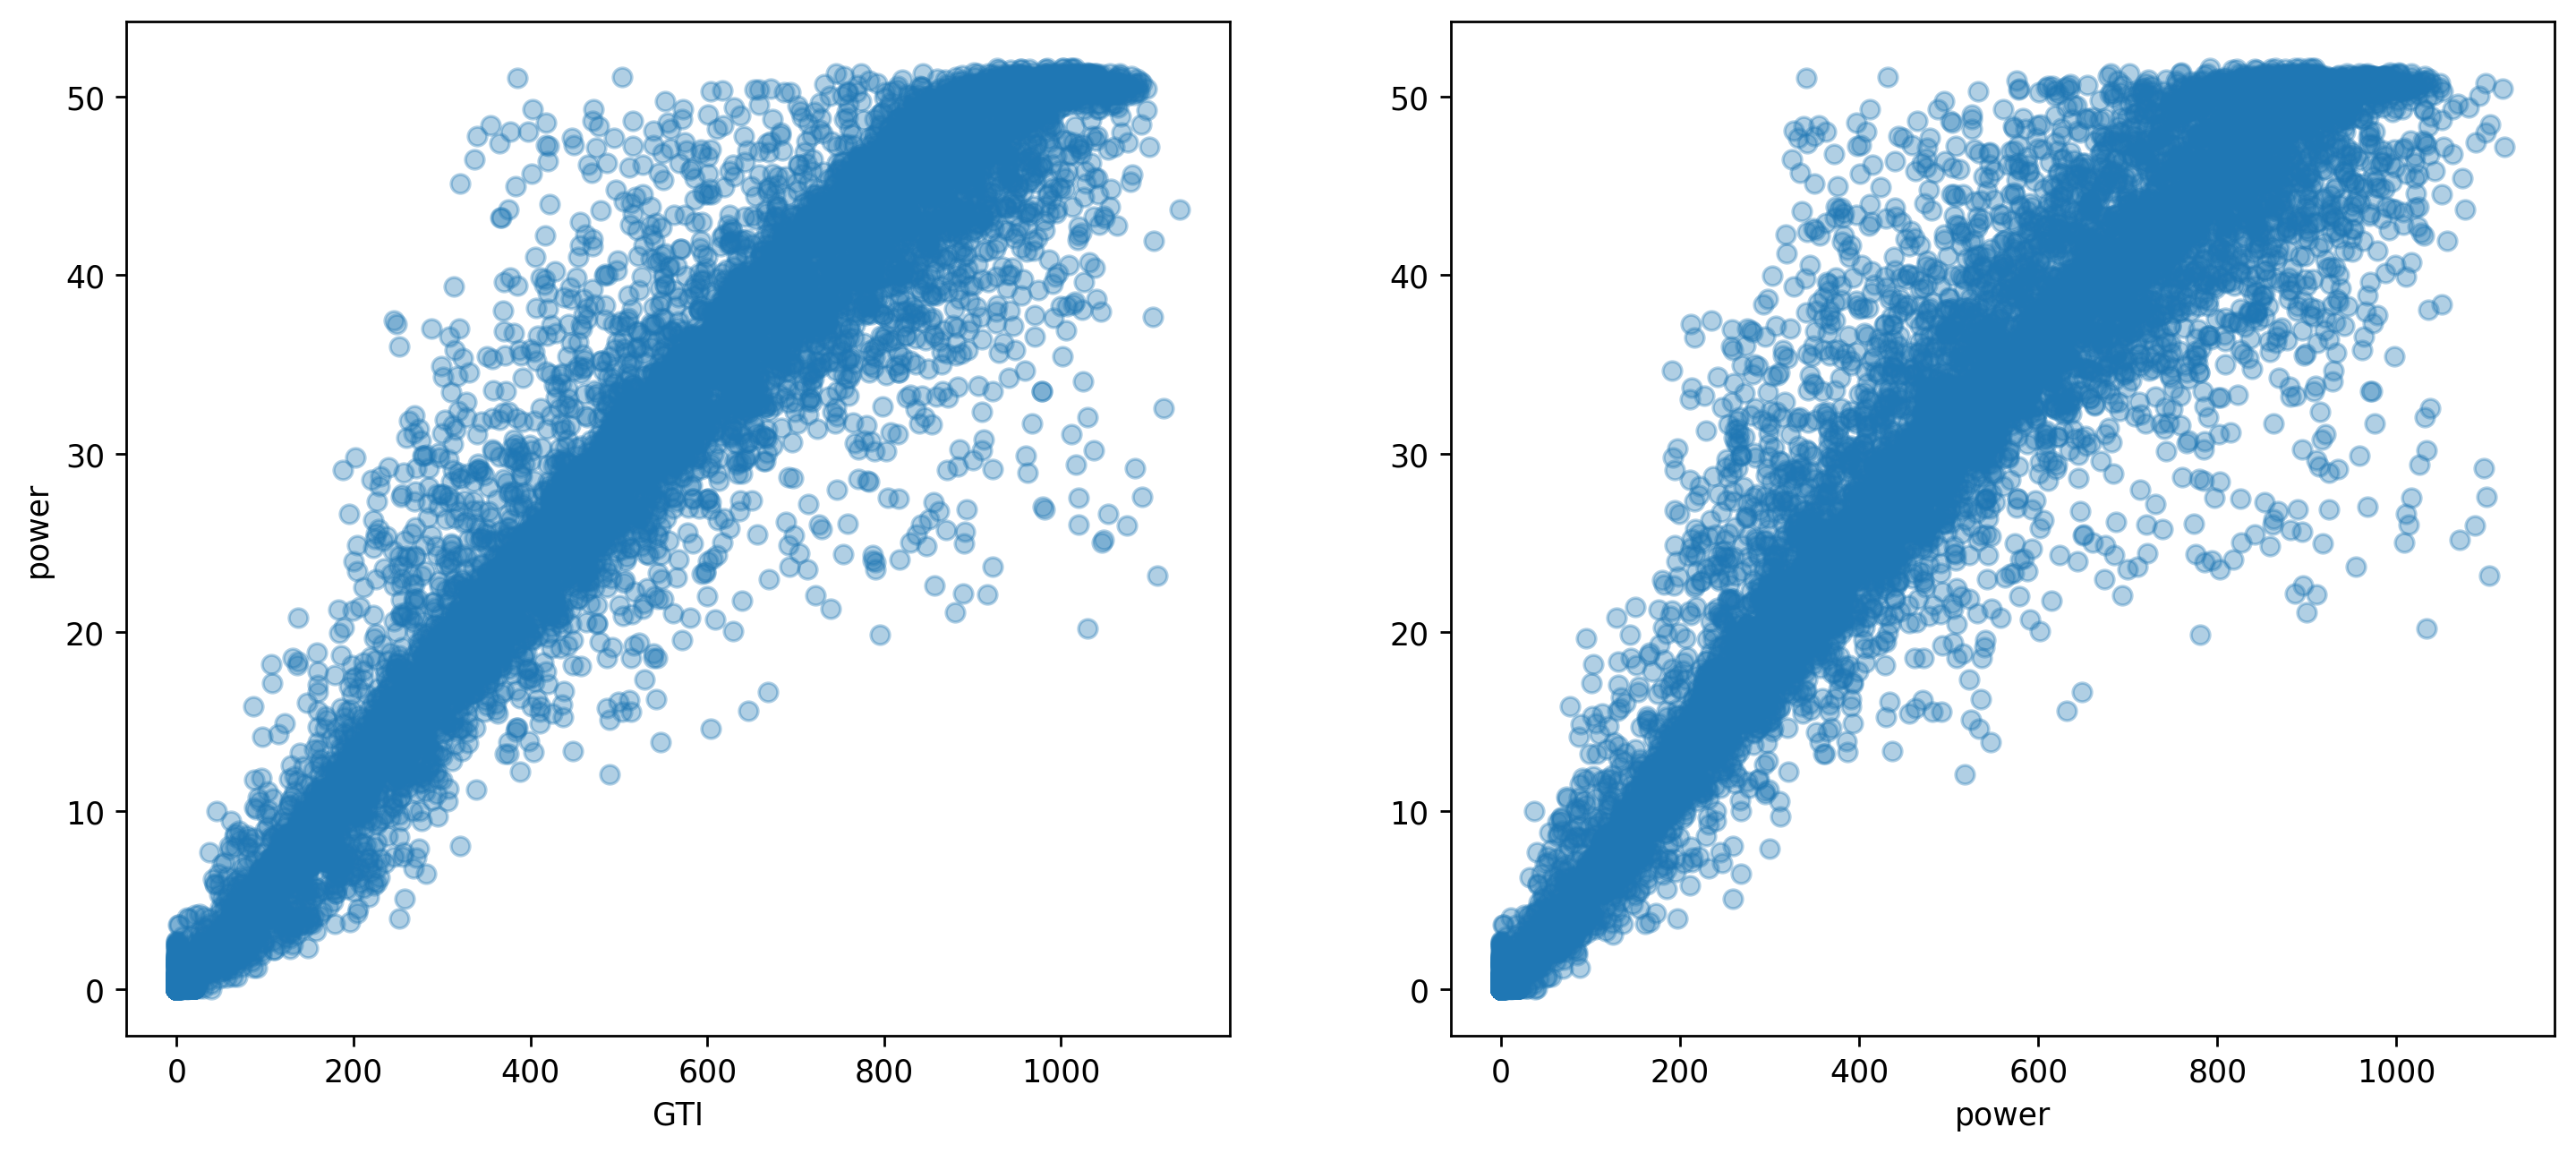

In [4]:
visualising_fig_1,visualising_axes_1 = plt.subplots(nrows=1,ncols=2,figsize=(14,6),dpi=250)
visualising_axes_1[0].scatter(block_1_cln_data['GTI'],block_1_cln_data['power'],alpha=0.35)
visualising_axes_1[0].set_xlabel('GTI')
visualising_axes_1[0].set_ylabel('power')
visualising_axes_1[1].scatter(block_1_cln_data['GHI'],block_1_cln_data['power'],alpha=0.35)
visualising_axes_1[1].set_xlabel('GHI')
visualising_axes_1[1].set_xlabel('power')

month           -0.048490
day              0.008228
time_in_float    0.024776
GHI              0.976420
GTI              0.982576
power            1.000000
Name: power, dtype: float64


<AxesSubplot:>

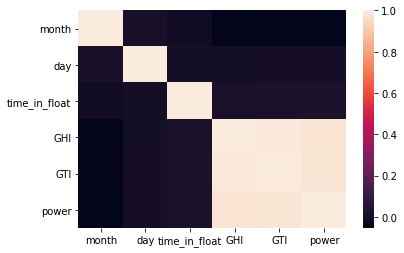

In [5]:
correlation = block_1_cln_data.corr()
print(correlation['power'])
sns.heatmap(data=correlation)

In [6]:
X = block_1_cln_data.drop('power',axis=1)
y = block_1_cln_data['power']

In [7]:
X_train_cv,X_test,y_train_cv,y_test = train_test_split(X,y,test_size = 0.1, random_state= 101, shuffle=True)

In [8]:
print(len(X_train_cv),len(X_test),len(block_1_cln_data))

20141 2238 22379


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear_model = LinearRegression()

In [11]:
linear_model_parameters = {'fit_intercept':[True], 'normalize':[False], 'copy_X':[True]}

In [12]:
linear_model_grid = GridSearchCV(linear_model,linear_model_parameters,cv=5)

In [13]:
linear_model_grid.fit(X_train_cv,y_train_cv)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'normalize': [False]})

In [16]:
sample_test_set_1.head()

,month,day,time_in_float,GHI,GTI
index,,,,,
10824,9,7,4.25,0.000000,0.000
21867,12,30,5.25,0.000000,0.000
26924,2,19,21.50,0.000000,0.000
27150,2,22,6.00,0.000000,0.000
23521,1,16,10.75,860.323333,954.506


,month,day,time_in_float,GHI,GTI
index,,,,,
10824,9,7,4.25,0.000000,0.000
21867,12,30,5.25,0.000000,0.000
26924,2,19,21.50,0.000000,0.000
27150,2,22,6.00,0.000000,0.000
23521,1,16,10.75,860.323333,954.506
...,...,...,...,...,...
18655,11,26,18.25,0.000000,0.000
27696,2,27,22.50,0.000000,0.000
2084,6,9,2.50,0.000000,0.000


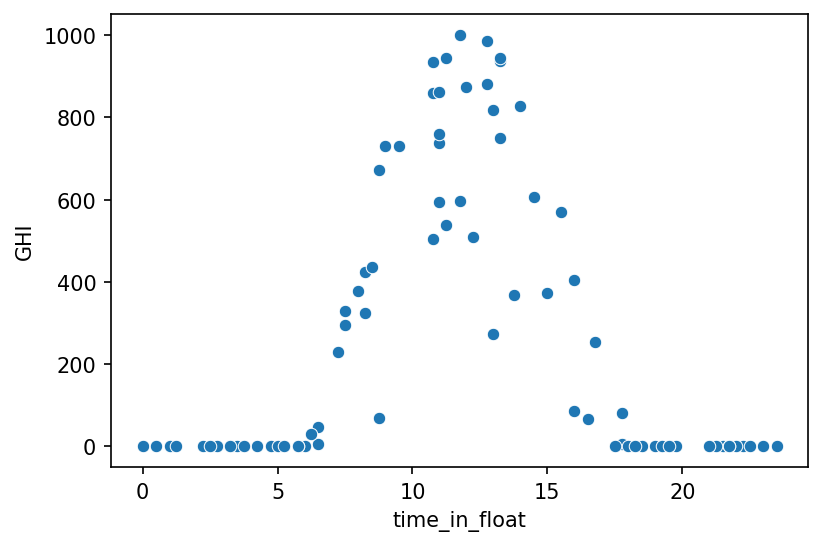

In [17]:
# we are going to predict power to understand the test set ploting time blocks with GHI
sample_test_set_1 = X_test.iloc[944:1040]
sample_test_set_1_labels = y_test.iloc[944:1040]
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data = sample_test_set_1,x='time_in_float',y='GHI')
# plt.plot('GTI','power',data=sample_test_set_1)

sample_test_set_1

<AxesSubplot:ylabel='Density'>

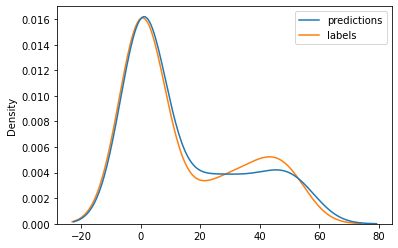

In [18]:
sample_test_set_1_pred = linear_model_grid.predict(sample_test_set_1)
df_1_dict = {'predictions':sample_test_set_1_pred,'labels': sample_test_set_1_labels}
df_1 = pd.DataFrame(df_1_dict)
sns.kdeplot(data=df_1)

In [19]:
from sklearn.metrics import mean_squared_error

In [21]:
# evaluating with the help of mean squared
linear_model_grid_mse = mean_squared_error(sample_test_set_1_labels,sample_test_set_1_pred)
print(f"Mean squared error : {linear_model_grid_mse}")
linear_model_grid_rmse = sqrt(linear_model_grid_mse)
print(f"Root mean squared error : {linear_model_grid_rmse}")

Mean squared error : 10.089269132561617
Root mean squared error : 3.1763609890189777


In [22]:
df_1.head(60)  # pridiction and labels to see the outputs from linear regression model

,predictions,labels
index,,
10824,0.469087,0.059562
21867,0.556830,0.050000
26924,0.717585,0.050000
27150,0.671396,0.050000
23521,51.404984,49.882000
13647,44.759626,45.911333
5944,16.291181,10.952533
16545,0.484463,0.050000
3504,0.677531,0.060000


**Making the train and CV set

In [23]:
# Again splitting the X_train_cv and y_train_cv so that it can be used for train and cross validate.

X_train,X_cv,y_train,y_cv = train_test_split(X_train_cv,y_train_cv,test_size = 0.2,random_state = 101,shuffle=True)


In [24]:
len(X_train),len(X_cv),len(y_train),len(y_cv)

(16112, 4029, 16112, 4029)

**Batch gradient descent

***stochastic Gradient Descent

In [25]:
from sklearn.linear_model import SGDRegressor

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [27]:
sgd_reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=5000, tol=1e-3,penalty=None,eta0=0.05))

In [28]:
sgd_reg.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(eta0=0.05, max_iter=5000, penalty=None))])

In [40]:
# def plot_learning_curves(model,X,y):
#     X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.2,random_state = 101,shuffle=True)
#     train_errors,val_errors = [],[]
#     for m in range(1, len(X_train)):
#         model.fit(X_train[:m],y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_cv_predict = model.predict(X_cv)
#         train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
#         val_errors.append(mean_squared_error(y_cv,y_cv_predict))
#         plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
#         plt.plot(np.sqrt(val_errors),"b-+",linewidth = 3,label="cv")

In [42]:
# plot_learning_curves(sgd_reg,X_train_cv,y_train_cv)

In [31]:
y_cv_pred = sgd_reg.predict(X_cv)

In [32]:
sgd_mse = mean_squared_error(y_cv,y_cv_pred)
sgd_mse_rmse = np.sqrt(sgd_mse)

In [34]:
# outputs of SGD regg

print(f"Mean squared error of SGD_reg : {sgd_mse}")
print(f"Root mean squared error of SGD_reg : {sgd_mse_rmse}")

Mean squared error of SGD_reg : 11.227426558221238
Root mean squared error of SGD_reg : 3.3507352265168966


**Using GridSearch CV for finding the optimal parameters

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = [{'max_iter':[1000,5000,10000,15000],'tol': [1e-3],'eta0':[0.01,0.05,0.1,0.5,0.7,1]}]

In [37]:
sgd_reg_plan = SGDRegressor()

In [38]:
sgd_reg_grid = GridSearchCV(sgd_reg_plan,param_grid,cv=5,scoring='neg_mean_squared_error', verbose=10)

In [39]:
sgd_reg_grid_model = make_pipeline(StandardScaler(),sgd_reg_grid)

In [41]:
sgd_reg_grid_model.fit(X_train,y_train)
print("done")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] eta0=0.01, max_iter=1000, tol=0.001 .............................
[CV]  eta0=0.01, max_iter=1000, tol=0.001, score=-10.831, total=   0.1s
[CV] eta0=0.01, max_iter=1000, tol=0.001 .............................
[CV]  eta0=0.01, max_iter=1000, tol=0.001, score=-10.446, total=   0.1s
[CV] eta0=0.01, max_iter=1000, tol=0.001 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  eta0=0.01, max_iter=1000, tol=0.001, score=-10.248, total=   0.1s
[CV] eta0=0.01, max_iter=1000, tol=0.001 .............................
[CV]  eta0=0.01, max_iter=1000, tol=0.001, score=-10.466, total=   0.1s
[CV] eta0=0.01, max_iter=1000, tol=0.001 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  eta0=0.01, max_iter=1000, tol=0.001, score=-9.108, total=   0.1s
[CV] eta0=0.01, max_iter=5000, tol=0.001 .............................
[CV]  eta0=0.01, max_iter=5000, tol=0.001, score=-10.813, total=   0.1s
[CV] eta0=0.01, max_iter=5000, tol=0.001 .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s


[CV]  eta0=0.01, max_iter=5000, tol=0.001, score=-10.441, total=   0.1s
[CV] eta0=0.01, max_iter=5000, tol=0.001 .............................
[CV]  eta0=0.01, max_iter=5000, tol=0.001, score=-10.256, total=   0.1s
[CV] eta0=0.01, max_iter=5000, tol=0.001 .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s


[CV]  eta0=0.01, max_iter=5000, tol=0.001, score=-10.466, total=   0.1s
[CV] eta0=0.01, max_iter=5000, tol=0.001 .............................
[CV]  eta0=0.01, max_iter=5000, tol=0.001, score=-9.136, total=   0.1s
[CV] eta0=0.01, max_iter=10000, tol=0.001 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s


[CV]  eta0=0.01, max_iter=10000, tol=0.001, score=-10.733, total=   0.1s
[CV] eta0=0.01, max_iter=10000, tol=0.001 ............................
[CV]  eta0=0.01, max_iter=10000, tol=0.001, score=-10.466, total=   0.1s
[CV] eta0=0.01, max_iter=10000, tol=0.001 ............................
[CV]  eta0=0.01, max_iter=10000, tol=0.001, score=-10.247, total=   0.1s
[CV] eta0=0.01, max_iter=10000, tol=0.001 ............................
[CV]  eta0=0.01, max_iter=10000, tol=0.001, score=-10.475, total=   0.1s
[CV] eta0=0.01, max_iter=10000, tol=0.001 ............................
[CV]  eta0=0.01, max_iter=10000, tol=0.001, score=-9.126, total=   0.1s
[CV] eta0=0.01, max_iter=15000, tol=0.001 ............................
[CV]  eta0=0.01, max_iter=15000, tol=0.001, score=-10.785, total=   0.1s
[CV] eta0=0.01, max_iter=15000, tol=0.001 ............................
[CV]  eta0=0.01, max_iter=15000, tol=0.001, score=-10.496, total=   0.1s
[CV] eta0=0.01, max_iter=15000, tol=0.001 ......................

[CV] . eta0=0.5, max_iter=5000, tol=0.001, score=-9.375, total=   0.1s
[CV] eta0=0.5, max_iter=10000, tol=0.001 .............................
[CV]  eta0=0.5, max_iter=10000, tol=0.001, score=-12.426, total=   0.1s
[CV] eta0=0.5, max_iter=10000, tol=0.001 .............................
[CV]  eta0=0.5, max_iter=10000, tol=0.001, score=-10.607, total=   0.1s
[CV] eta0=0.5, max_iter=10000, tol=0.001 .............................
[CV]  eta0=0.5, max_iter=10000, tol=0.001, score=-11.331, total=   0.1s
[CV] eta0=0.5, max_iter=10000, tol=0.001 .............................
[CV]  eta0=0.5, max_iter=10000, tol=0.001, score=-12.652, total=   0.1s
[CV] eta0=0.5, max_iter=10000, tol=0.001 .............................
[CV]  eta0=0.5, max_iter=10000, tol=0.001, score=-9.245, total=   0.1s
[CV] eta0=0.5, max_iter=15000, tol=0.001 .............................
[CV]  eta0=0.5, max_iter=15000, tol=0.001, score=-13.694, total=   0.1s
[CV] eta0=0.5, max_iter=15000, tol=0.001 .............................
[

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   10.0s finished


In [44]:
sgd_predict_grid = sgd_reg_grid_model.predict(X_cv)

print(f"Mean squared error : {mean_squared_error(y_cv,sgd_predict_grid)}")
print(f"Root mean squared error : {np.sqrt(mean_squared_error(y_cv,sgd_predict_grid))}")

Mean squared error : 11.176142228349258
Root mean squared error : 3.3430737695045347


 # Testing RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
parameters = [
    {'n_estimators':[30,50,70,90],'max_features':[2,3,4]},
    {'bootstrap':[False],'n_estimators':[70],'max_features':[2,3,4]}
]

forest_regresor = RandomForestRegressor()

grid_search_rfr = GridSearchCV(forest_regresor,parameters,cv=5,scoring='neg_mean_squared_error',refit=True,return_train_score = True)

In [49]:
grid_search_rfr.fit(X_train,y_train) # training that model over the trainig set

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [30, 50, 70, 90]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [70]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
grid_search_rfr.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 70}

In [51]:
rfr_grid_search_predict = grid_search_rfr.predict(X_cv)  #pridictions over the cross validation set

In [54]:
rfr_mse = mean_squared_error(y_cv,rfr_grid_search_predict) 

print(f"Mean squared error of RFR : {rfr_mse}")

Mean squared error of RFR : 4.3344134978845155


In [53]:
rfr_rmse = sqrt(mean_squared_error(y_cv,rfr_grid_search_predict))

print(f"Root mean squared error of RFR : {rfr_rmse}")

Root mean squared error of RFR : 2.081925430433212


<AxesSubplot:ylabel='Density'>

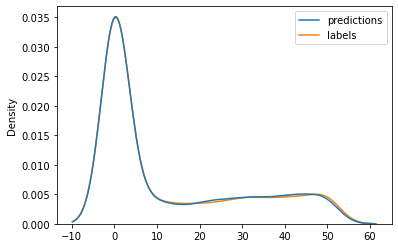

In [55]:
df_3_dict = {'predictions':rfr_grid_search_predict,'labels': y_cv}
df_3 = pd.DataFrame(df_3_dict)
sns.kdeplot(data=df_3)

# #Training model over the training set as well as cross validation set

In [56]:
grid_search_rfr.fit(X_train_cv,y_train_cv)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [30, 50, 70, 90]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [70]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
rfr_predictions_testset_0 = grid_search_rfr.predict(X_test) # pridictions over the main test set after training on the whole train set


In [58]:
mean_squared_error(y_test,rfr_predictions_testset_0)

4.339195960558989

In [59]:
sqrt(mean_squared_error(y_test,rfr_predictions_testset_0))

2.083073681020186

# Testing the Random forest regressor over the test set

In [61]:
rfr_predictions_testset = grid_search_rfr.predict(X_test)

In [65]:
rfr_mse_test_set = mean_squared_error(y_test,rfr_predictions_testset)

print(f"Mean squared error of RFR for test set : {rfr_mse_test_set}")

Mean squared error of RFR for test set : 4.339195960558989


In [66]:
rfr_rmse_test_set = sqrt(mean_squared_error(y_test,rfr_predictions_testset)) # mean rmse for rfr

print(f"Root mean squared error of RFR for test set : {rfr_rmse_test_set}")

Root mean squared error of RFR for test set : 2.083073681020186


# Random Forest Regressor performers better.